<a href="https://colab.research.google.com/github/DANU011/practice-analysis/blob/main/bigdata/bigdata_chap3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

wine_load = load_wine()
wine = pd.DataFrame(wine_load.data, columns=wine_load.feature_names)
wine['Class'] = wine_load.target
wine['Class'] = wine['Class'].map({0:'class_0', 1:'class_1', 2:'class_2'})
wine_type = wine['Class'].value_counts()
wine_type

class_1    71
class_0    59
class_2    48
Name: Class, dtype: int64

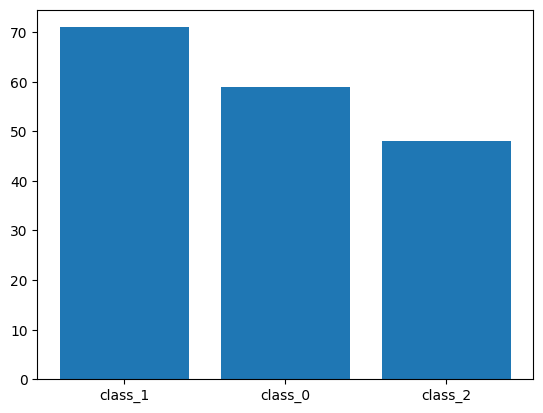

In [38]:
# 막대그래프 그리기
plt.bar(wine_type.index, wine_type.values, # 데이터의 x, 높이
        width = 0.8, bottom = None, # 막대의 넓이와 막대 밑면의 y좌표
        align = 'center') # 막대의 정렬
plt.show()

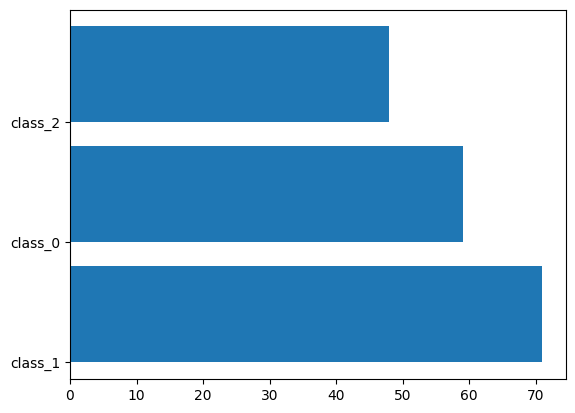

In [39]:
plt.barh(wine_type.index, wine_type.values, height = 0.8, left = None, align = 'edge')
plt.show()

In [40]:
# 범주의 개수 차이가 극단적일 경우 데이터 전처리 과정에서 업/다운 샘플링 등을 통해 각 범주 개수가 유사하도록 조정해야 한다는 인사이트를 얻을 수 있다.

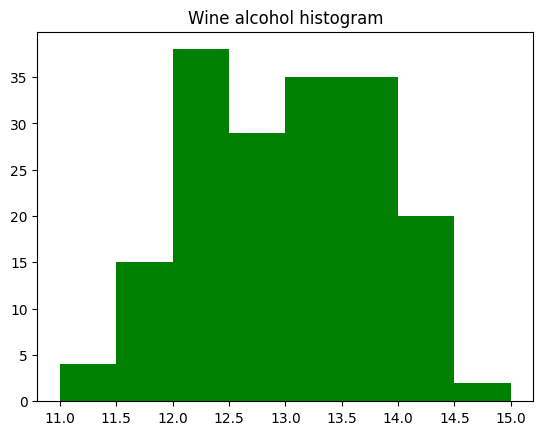

In [41]:
plt.title('Wine alcohol histogram')
plt.hist('alcohol', bins = 8, range = (11, 15), color = 'green', data = wine)
plt.show()

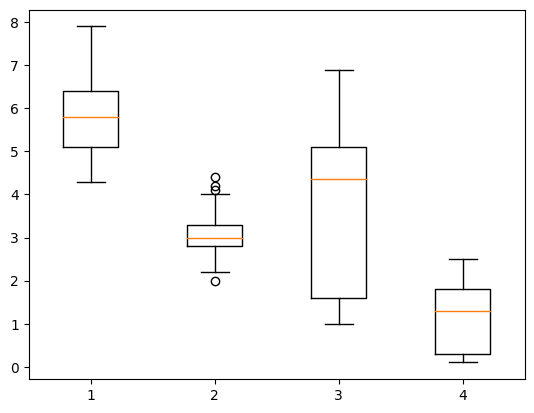

In [42]:
from sklearn.datasets import load_iris

iris = load_iris()
iris = pd.DataFrame(iris.data, columns = iris.feature_names)
iris['class'] = load_iris().target
iris['class'] = iris['class'].map({0 : 'Setosa', 1 : 'Versicolour', 2 : 'Virginica'})

# boxplot 그리기
plt.boxplot(iris.drop(columns = 'class'))
plt.show()

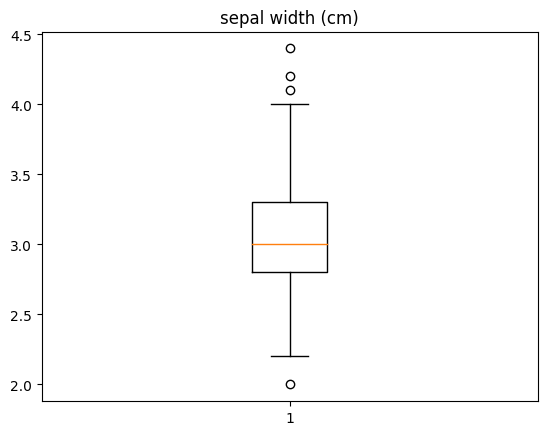

In [43]:
plt.boxplot(iris['sepal width (cm)'], whis = 1.5)
plt.title('sepal width (cm)')
plt.show()

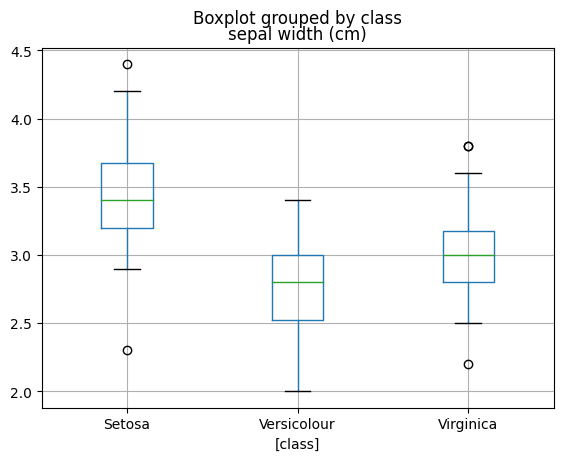

In [44]:
iris[['sepal width (cm)', 'class']].boxplot(by = 'class')
plt.show()

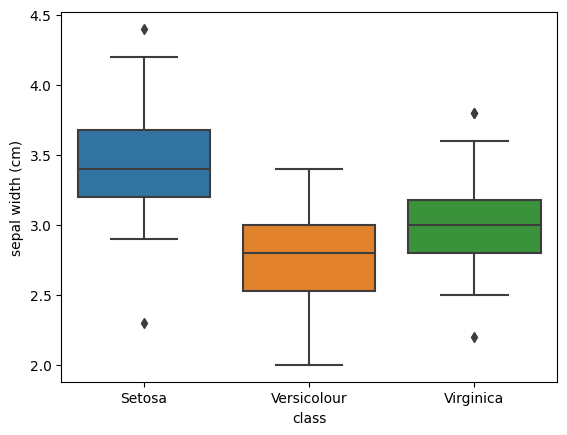

In [45]:
import seaborn as sns
sns.boxplot(x = 'class', y = 'sepal width (cm)', data = iris)
plt.show()

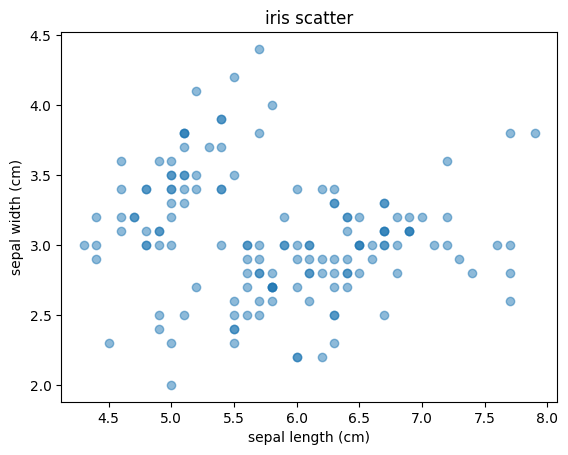

In [46]:
plt.title('iris scatter')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

plt.scatter(x = iris['sepal length (cm)'], y = iris['sepal width (cm)'], alpha = 0.5)
plt.show()

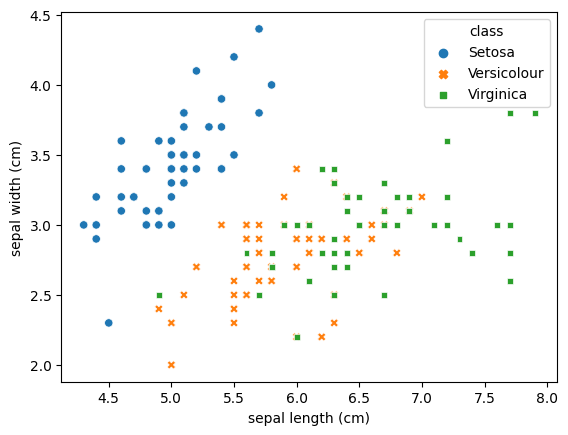

In [47]:
sns.scatterplot(x = 'sepal length (cm)', y = 'sepal width (cm)', data = iris,
                hue = 'class', style = 'class')
plt.show()

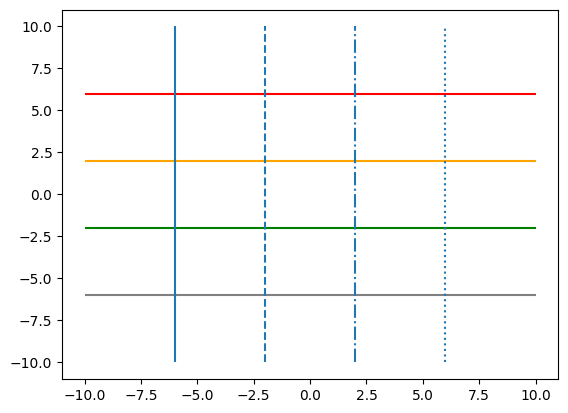

In [48]:
plt.hlines(-6, -10, 10, color='grey')
plt.hlines(-2, -10, 10, color='green')
plt.hlines(2, -10, 10, color='orange')
plt.hlines(6, -10, 10, color='red')

plt.vlines(-6, -10, 10, linestyles='solid')
plt.vlines(-2, -10, 10, linestyles='dashed')
plt.vlines(2, -10, 10, linestyles='dashdot')
plt.vlines(6, -10, 10, linestyles='dotted')
plt.show()

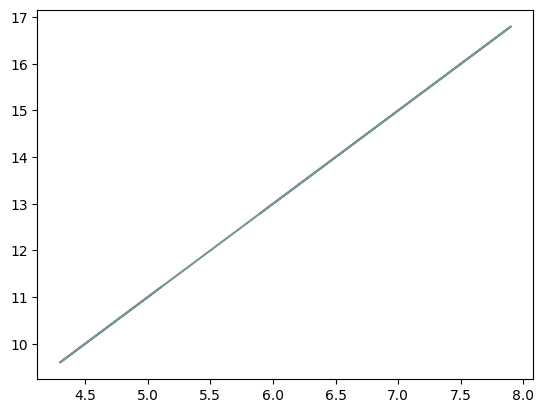

In [49]:
# 그래프
def linear_func(x) :
  return 2 * x + 1

X = iris['sepal length (cm)']
plt.plot(X, linear_func(X), c = '#789395')
plt.show()

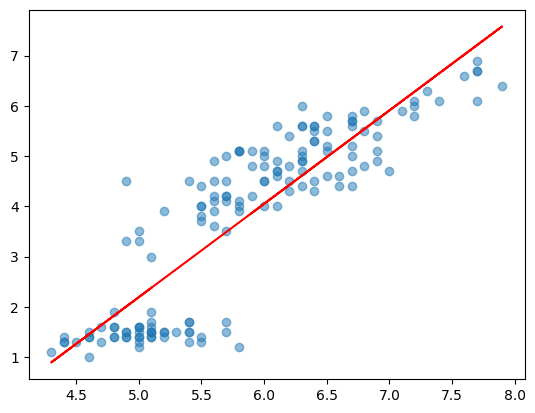

In [50]:
import numpy as np

X, Y = iris['sepal length (cm)'], iris['petal length (cm)']
b1, b0 = np.polyfit(X, Y, 1)
plt.scatter(x = X, y = Y, alpha = 0.5)
plt.plot(X, b1 * X + b0, color = 'red')
plt.show()

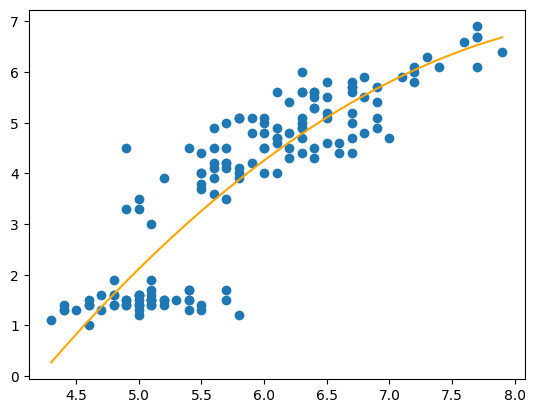

In [51]:
iris2 = iris.sort_values(by = 'sepal length (cm)')
X, Y = iris2['sepal length (cm)'], iris2['petal length (cm)']
b2, b1, b0 = np.polyfit(X, Y, 2)
plt.scatter(x = X, y = Y, alpha = 1)
plt.plot(X, b0 + b1 * X + b2 * X ** 2, color = 'orange')
plt.show()

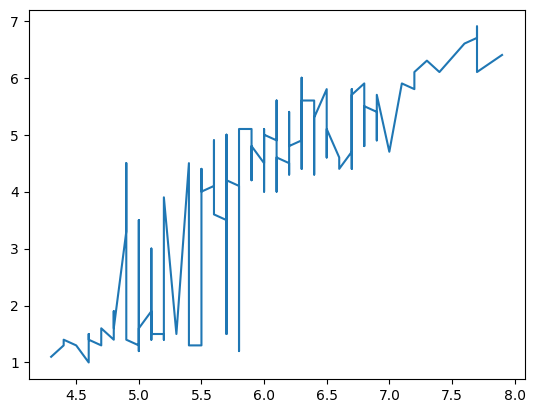

In [52]:
# 꺾은선 그래프 - 시점 변화
iris2 = iris.sort_values(by = 'sepal length (cm)')
plt.plot('sepal length (cm)', 'petal length (cm)', data = iris2)
plt.show()

In [ ]:
'''
lt.plot('sepal length (cm)', 'petal length (cm)',
         data=iris2.loc[iris2['class'] == 'Setosa'])
plt.plot('sepal length (cm)',
         'petal length (cm)', data=iris2.loc[iris2['class'] == 'Versicolour'])
plt.plot('sepal length (cm)',
         'petal length (cm)', data=iris2.loc[iris2['class'] == 'Virginica'])
plt.legend(iris2.class.unique())
plt.show()p
'''

In [58]:
print(iris2.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'class'],
      dtype='object')


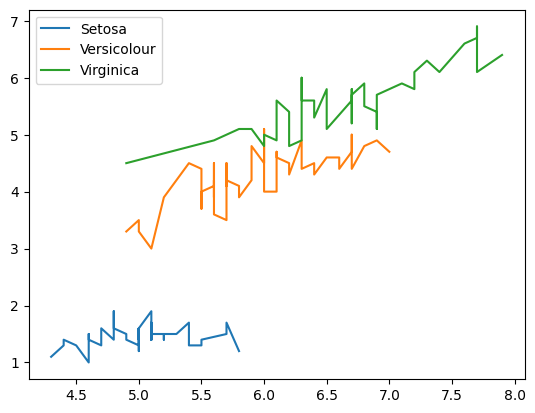

In [59]:
# 데이터프레임에서 데이터 필터링
setosa_data = iris2.loc[iris2['class'] == 'Setosa']
versicolour_data = iris2.loc[iris2['class'] == 'Versicolour']
virginica_data = iris2.loc[iris2['class'] == 'Virginica']

# 그래프 그리기
plt.plot(setosa_data['sepal length (cm)'], setosa_data['petal length (cm)'], label='Setosa')
plt.plot(versicolour_data['sepal length (cm)'], versicolour_data['petal length (cm)'], label='Versicolour')
plt.plot(virginica_data['sepal length (cm)'], virginica_data['petal length (cm)'], label='Virginica')

# 범례 추가
plt.legend()

# 그래프 표시
plt.show()

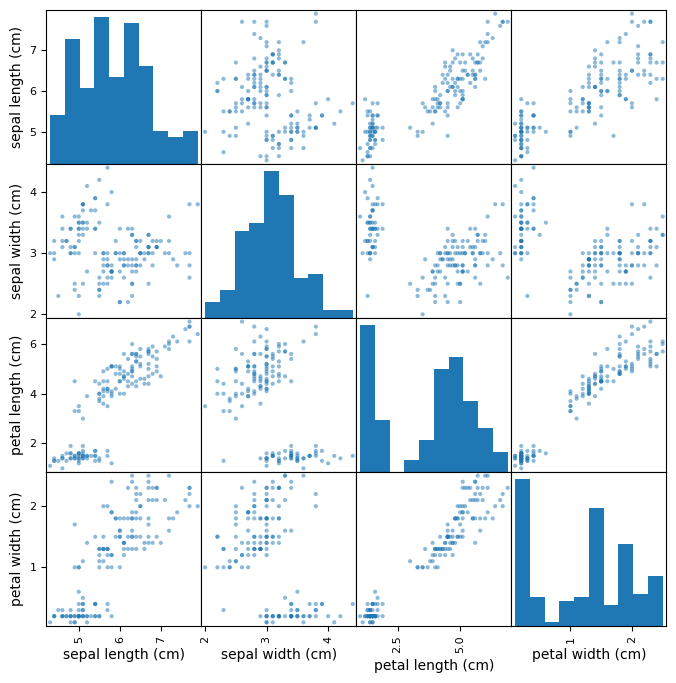

In [61]:
from pandas.plotting import scatter_matrix

scatter_matrix(iris, alpha = 0.5, figsize = (8, 8), diagonal = 'hist')
plt.show()

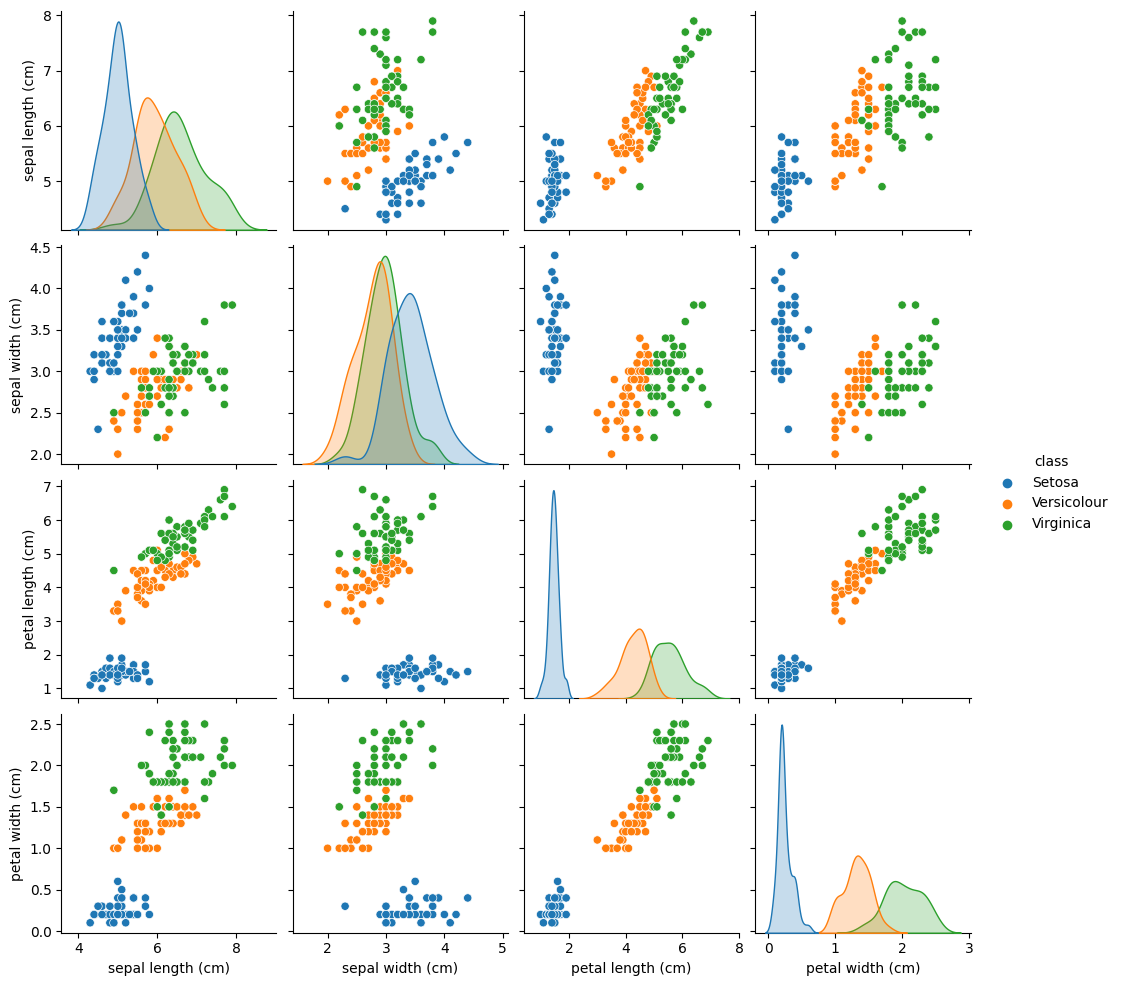

In [62]:
sns.pairplot(iris, diag_kind = 'auto', hue = 'class')
plt.show()

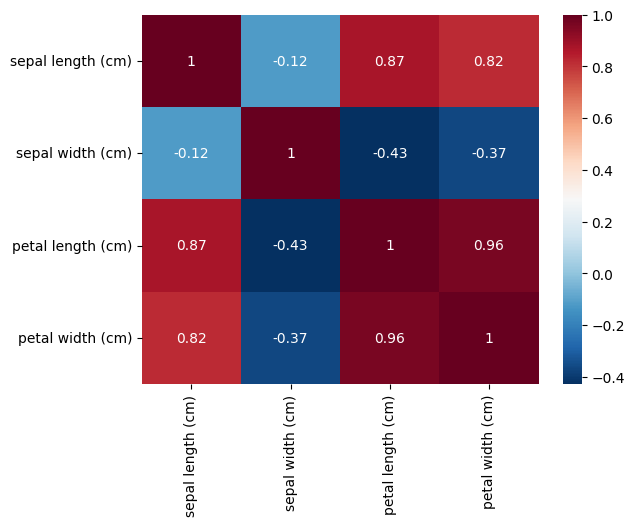

In [63]:
iris_corr = iris.drop(columns='class').corr(method = 'pearson')
sns.heatmap(iris_corr, xticklabels = iris_corr.columns,
            yticklabels = iris_corr.columns, cmap = 'RdBu_r', annot = True)
plt.show()

In [64]:
# !pip uninstall pandas_profiling

In [65]:
# !pip install pandas_profiling

In [ ]:
'''
import pandas as pd
from sklearn.datasets import load_iris
from pandas_profiling import ProfileReport

iris = load_iris()
iris = pd.DataFrame(iris.data, columns = iris.feature_names)
iris['class'] = load_iris().target
iris['class'] = iris['class'].map({0 : 'Setosa', 1 : 'Versicolour', 2 : 'Virginica'})

# pandas 프로파일링
ProfileReport(iris)
'''